In [ ]:
!pip install sympy
!pip install numpy
!pip install scipy
!pip install control
!pip install matplotlib
!pip install sciscipy

ERROR: Could not find a version that satisfies the requirement sciscipy (from versions: none)
ERROR: No matching distribution found for sciscipy


In [ ]:
!pip install control
import control
C= control.tf([self.J,0,0,0,2*self.D],[self.Iz,0,0,0,0,0])
T, yout = step_response(C, T, X0)

In [ ]:
import control
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from math import factorial,cos,sin,pi


In [ ]:
class Quadcopter:
  '''
  system constants:
  Z: motor resistor
  Ke: motor constant of voltage
  J: rotor inertia
  Kq: motor constant of torque
  D: drag torque contsant
  n: motor effeciency
  f: propeller figure of merit (iduced power/mechanical power)
  Kt: trust constant
  row: air density
  A: propeller face area
  Ix: inertial arround x
  Iy: inertial arround y
  Iz: inertia arround z
  Rp: rotor blade
  '''

  m=0.65
  l=0.19
  Ix=0.0075
  Iy=0.0075
  Iz=0.013
  Rp=0.16
  f=0.5
  J=0.00006
  R=0.6
  Ke=0.0015
  Kq=0.0056
  n=0.75
  Kt=0.01
  g=9.81
  D=0.00000075
  row=1.1
  A= 3.141817*Rp*Rp
  
  __v1= 1
  __v2=1
  __v3=1
  __v4=1
  __raw_v1=1
  __raw_v2=1
  __raw_v3=1
  __raw_v4=1
  __roll_response=0
  __pitch_response=0
  __yaw_response=0
  __x_response=0
  __y_response=0
  __z_response=0

  def __motorSpeed(self,V):
    motorSpeed= control.tf([self.Kq,0,0,0],[self.R*self.J,self.Ke*self.Kq,0,0,2*self.R*self.D])
    return motorSpeed*V

  def __plot_data(self,title,unit):
    if title =="Pitch Response":
      data=self.__pitch_response
    if title=="Yaw Response":
      data=self.__yaw_response
    if title=="Roll Response":
      data=self.__roll_response
    if title=="X Response":
      data=self.__x_response
    if title=="Y Response":
      data=self.__y_response
    if title=="Z Response":
      data=self.__z_response
    plt.figure(figsize=(15, 9))
    plt.title(title)
    plt.xlabel("time (s)")
    plt.ylabel("Response"+ unit)
    plt.axis([0, 4, np.min(data[1][0:(int(4/(1+data[0][1]-data[0][0])))]), np.max(data[1][0:(1+int(4/(data[0][1]-data[0][0])))])])
    plt.grid(True)
    plt.xticks(range(5))
    # plotting response signals
    plt.plot(*data, "o--", color="grey", alpha=0.5)
    plt.show()

  def pitch_response(self):

    if (self.__v3-self.__v1).num[0][0][0]==0:
      times=[]
      resps=[]
      for i in range(100):
        times.append(i*0.1)
        resps.append(0)
      self.__pitch_response=times,resps
    else:
      C= (4*self.row*self.A*self.l)*(self.f*self.n*self.Kt)*(self.f*self.n*self.Kt)/(self.Iy*self.Kq*self.Kq)
      pitch =control.tf([C],[1,0,0,0,0,0]) * self.__v3 - control.tf([C],[1,0,0,0,0,0]) * self.__v1
      self.__pitch_response= control.impulse_response(pitch)
    self.__plot_data("Pitch Response","(rad)")

  def yaw_response(self):

    if ((self.__v1+self.__v3)-(self.__v2+self.__v4)).num[0][0][0]==0:
      times=[]
      resps=[]
      for i in range(100):
        times.append(i*0.1)
        resps.append(0)
      self.__yaw_response=times,resps
    else:
      C= control.tf([self.J,0,0,0,2*self.D],[self.Iz,0,0,0,0,0])
      yaw= C*(self.__motorSpeed(self.__v1)+self.__motorSpeed(self.__v3)-self.__motorSpeed(self.__v2)-self.__motorSpeed(self.__v4))
      self.__yaw_response= control.impulse_response(yaw)
    self.__plot_data("Yaw Response","(rad)")

  def roll_response(self):

    if (self.__v2-self.__v4).num[0][0][0]==0:
      times=[]
      resps=[]
      for i in range(100):
        times.append(i*0.1)
        resps.append(0)
      self.__roll_response=times,resps
    else:
      C= (4*self.row*self.A*self.l)*(self.f*self.n*self.Kt)*(self.f*self.n*self.Kt)/(self.Iy*self.Kq*self.Kq)
      roll= control.tf([C],[1,0,0,0]) * self.__v2 - control.tf([C],[1,0,0,0]) * self.__v4
      self.__roll_response= control.impulse_response(roll)
    self.__plot_data("Roll Response","(rad)")

  def responses(self):
    self.roll_response()
    self.pitch_response()
    self.yaw_response()
    self.x_response()
    self.y_response()
    self.z_response()


  def input( self,V1,V2,V3,V4):
    #for now we use ploynomial inputs only
    self.__raw_v1=V1
    self.__raw_v2=V2
    self.__raw_v3=V3
    self.__raw_v4=V4
    n1 = len(V1)
    no1=[]
    de1=[]
    for i in range(n1):
      no1.append(V1[(n1-1)-i]*factorial(i))
      if i==0:
        de1.append(1)
      else:
        de1.append(0)
    de1.append(0)
    n2 = len(V2)
    no2=[]
    de2=[]
    for i in range(n2):
      no2.append(V2[(n2-1)-i]*factorial(i))
      if i==0:
        de2.append(1)
      else:

        de2.append(0)
    de2.append(0)
    n3 = len(V3)
    no3=[]
    de3=[]
    for i in range(n3):
      no3.append(V3[(n3-1)-i]*factorial(i))
      if i==0:
        de3.append(1)
      else:
        de3.append(0)

    de3.append(0)
    n4 = len(V4)
    no4=[]
    de4=[]
    for i in range(n4):
      no4.append(V4[(n4-1)-i]*factorial(i))
      if i==0:
        de4.append(1)
      else:
        de4.append(0)
    de4.append(0)
    self.__v1= control.tf(no1,de1)
    print("V1 transfer function =",self.__v1)
    self.__v2= control.tf(no2,de2)
    print("V2 transfer function =",self.__v2)
    self.__v3= control.tf(no3,de3)
    print("V3 transfer function =",self.__v3)
    self.__v4= control.tf(no4,de4)
    print("V4 transfer function =",self.__v4)
  def __x(self,t,ro,pt,ya):
    V1=0
    V2=0
    V3=0
    V4=0
    for i in range(len(self.__raw_v1)):
      V1=V1+self.__raw_v1[i]*(t**(len(self.__raw_v1)-i-1))
    for i in range(len(self.__raw_v2)):
      V2=V2+self.__raw_v2[i]*(t**(len(self.__raw_v2)-i-1))
    for i in range(len(self.__raw_v3)):
      V3=V3+self.__raw_v3[i]*(t**(len(self.__raw_v3)-i-1))
    for i in range(len(self.__raw_v1)):
      V4=V4+self.__raw_v4[i]*(t**(len(self.__raw_v4)-i-1))
    
    C= (2*self.row*self.A)*(self.f*self.n*self.Kt)*(self.f*self.n*self.Kt)/(self.m*self.Kq*self.Kq)
    return C*(V1**2+V2**2+ V3**2 + V4**2)*(sin(ro)*sin(ya)+cos(ro)*cos(ya)*sin(pt))
  def x_response(self):
    v=0
    x=0
    time_array=[]
    response_array=[]
    for i in range(len(self.__roll_response[0])-1):
      dt= self.__roll_response[0][i+1]-self.__roll_response[0][i]
      x=x+v*dt
      v=v+ dt * self.__x(self.__roll_response[0][i],self.__roll_response[1][i+1],self.__pitch_response[1][i+1],self.__yaw_response[1][i+1])
      time_array.append(self.__roll_response[0][i])
      response_array.append(x)
    time_array.append(self.__roll_response[0][len(self.__roll_response[0])-1])
    response_array.append(x)
    self.__x_response = time_array,response_array
    self.__plot_data("X Response","(m)")

  def __y(self,t,ro,pt,ya):
    V1=0
    V2=0
    V3=0
    V4=0
    for i in range(len(self.__raw_v1)):
      V1=V1+self.__raw_v1[i]*(t**(len(self.__raw_v1)-i-1))
    for i in range(len(self.__raw_v2)):
      V2=V2+self.__raw_v2[i]*(t**(len(self.__raw_v2)-i-1))
    for i in range(len(self.__raw_v3)):
      V3=V3+self.__raw_v3[i]*(t**(len(self.__raw_v3)-i-1))
    for i in range(len(self.__raw_v1)):
      V4=V4+self.__raw_v4[i]*(t**(len(self.__raw_v4)-i-1))
    
    C= (2*self.row*self.A)*(self.f*self.n*self.Kt)*(self.f*self.n*self.Kt)/(self.m*self.Kq*self.Kq)
    return C*(V1**2+V2**2+ V3**2 + V4**2)*(sin(ya)*sin(pt)*cos(ro)-cos(ya)*sin(ro))
  def y_response(self):
    v=0
    y=0
    time_array=[]
    response_array=[]
    for i in range(len(self.__roll_response[0])-1):
      dt= self.__roll_response[0][i+1]-self.__roll_response[0][i]
      y=y+v*dt
      v=v+ dt * self.__y(self.__roll_response[0][i],self.__roll_response[1][i+1],self.__pitch_response[1][i+1],self.__yaw_response[1][i+1])
      time_array.append(self.__roll_response[0][i])
      response_array.append(y)
    time_array.append(self.__roll_response[0][len(self.__roll_response[0])-1])
    response_array.append(y)
    self.__y_response = time_array,response_array
    self.__plot_data("Y Response","(m)")


  def __z(self,t,ro,pt,ya):
    V1=0
    V2=0
    V3=0
    V4=0
    for i in range(len(self.__raw_v1)):
      V1=V1+self.__raw_v1[i]*(t**(len(self.__raw_v1)-i-1))
    for i in range(len(self.__raw_v2)):
      V2=V2+self.__raw_v2[i]*(t**(len(self.__raw_v2)-i-1))
    for i in range(len(self.__raw_v3)):
      V3=V3+self.__raw_v3[i]*(t**(len(self.__raw_v3)-i-1))
    for i in range(len(self.__raw_v1)):
      V4=V4+self.__raw_v4[i]*(t**(len(self.__raw_v4)-i-1))
    
    C= (2*self.row*self.A)*(self.f*self.n*self.Kt)*(self.f*self.n*self.Kt)/(self.m*self.Kq*self.Kq)
    return C*(V1**2+V2**2+ V3**2 + V4**2)*(cos(pt)*cos(ro))-self.g
  def z_response(self):
    v=0
    z=0
    time_array=[]
    response_array=[]
    for i in range(len(self.__roll_response[0])-1):
      dt= self.__roll_response[0][i+1]-self.__roll_response[0][i]
      z=z+v*dt
      v=v+ dt * self.__z(self.__roll_response[0][i],self.__roll_response[1][i+1],self.__pitch_response[1][i+1],self.__yaw_response[1][i+1])
      time_array.append(self.__roll_response[0][i])
      if z<0:
        z=0
      response_array.append(z)
    time_array.append(self.__roll_response[0][len(self.__roll_response[0])-1])
    response_array.append(z)
    self.__z_response = time_array,response_array
    self.__plot_data("Z Response","(m)")
  def sizes(self):
    print(len(self.__roll_response[0]))
    print(len(self.__pitch_response[0]))
    print(len(self.__yaw_response[0]))
    print(len(self.__x_response[0]))
    print(len(self.__y_response[0]))
    print(len(self.__z_response[0]))

V1 transfer function = 
4.48
----
  s

V2 transfer function = 
4.48
----
  s

V3 transfer function = 
4.48
----
  s

V4 transfer function = 
4.48
----
  s



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


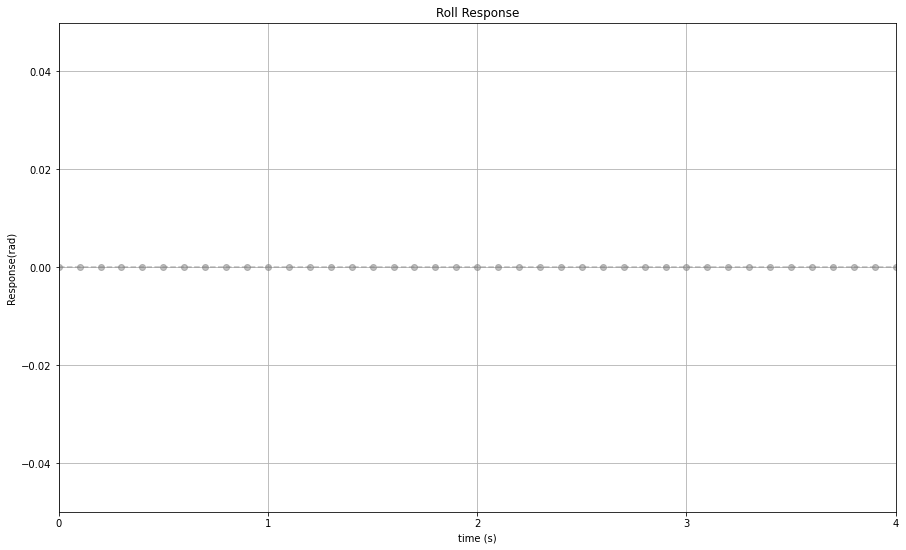

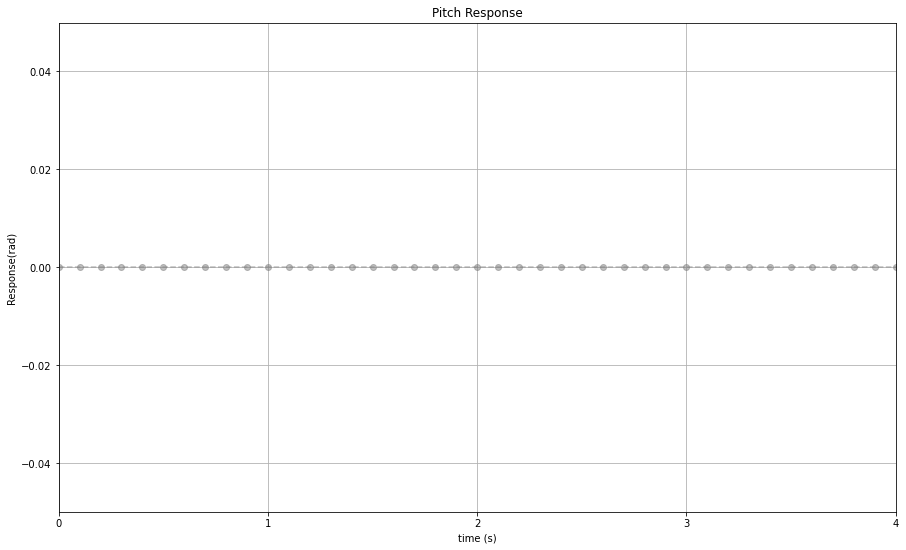

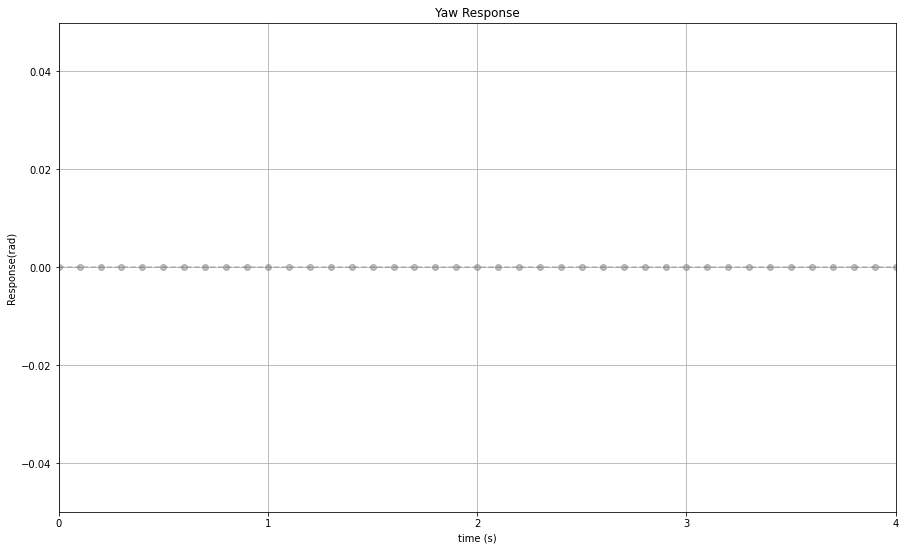

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


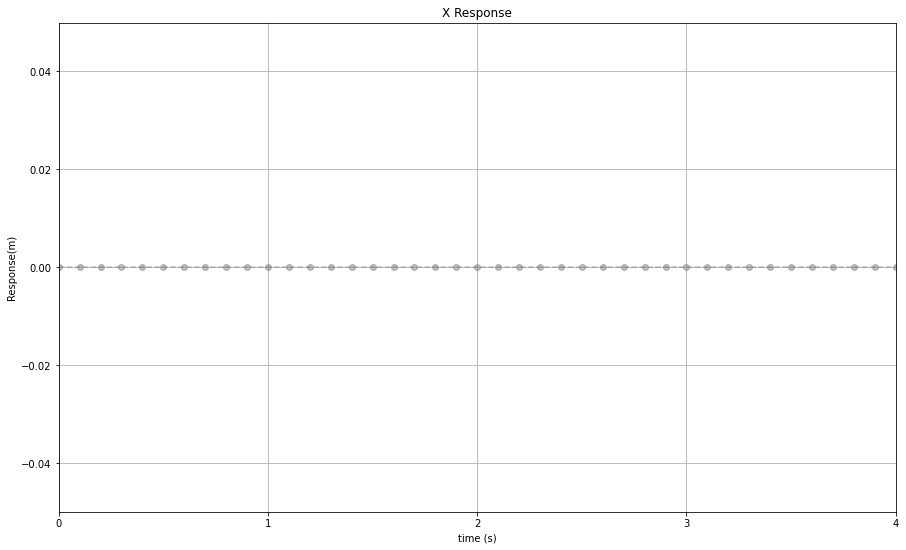

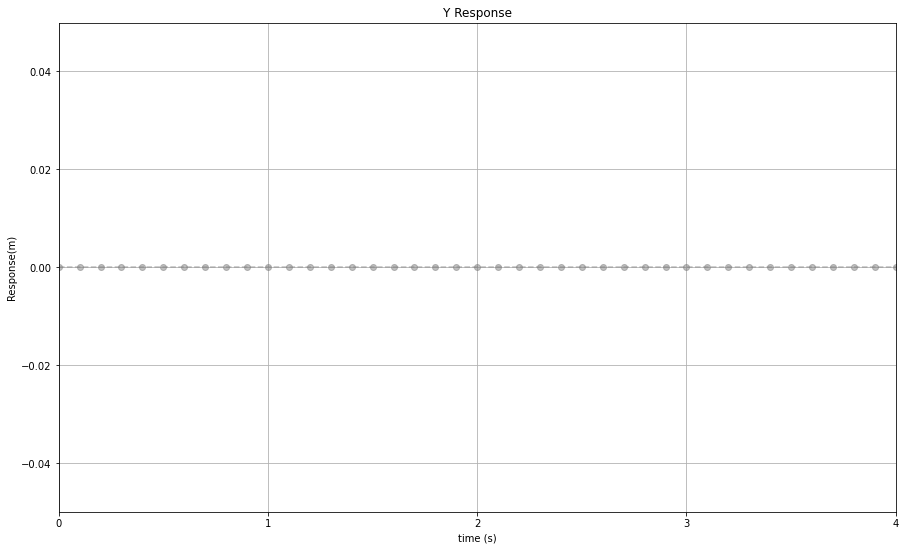

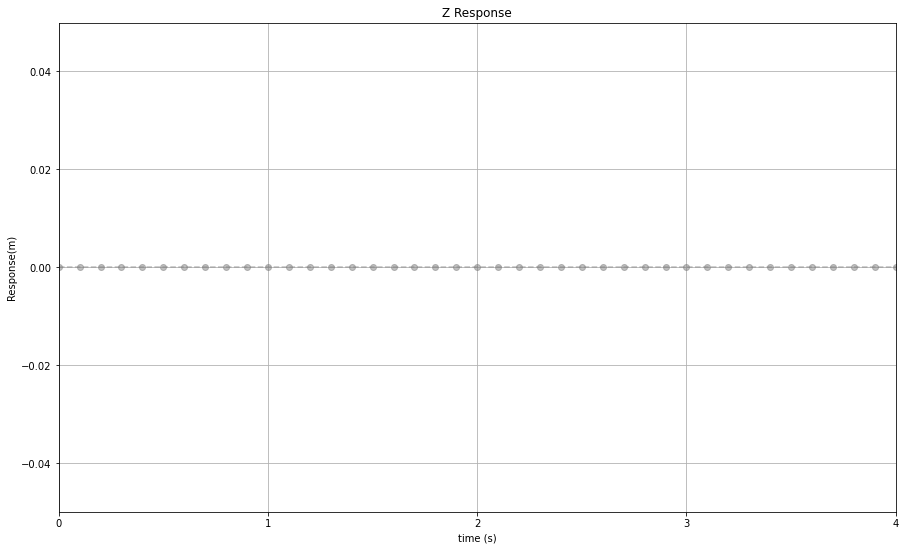

In [ ]:
#Hovering test
test1 = Quadcopter()
test1.input([4.48],[4.48],[4.48],[4.48])
test1.responses()


V1 transfer function = 
4.52
----
  s

V2 transfer function = 
4.52
----
  s

V3 transfer function = 
4.52
----
  s

V4 transfer function = 
4.52
----
  s



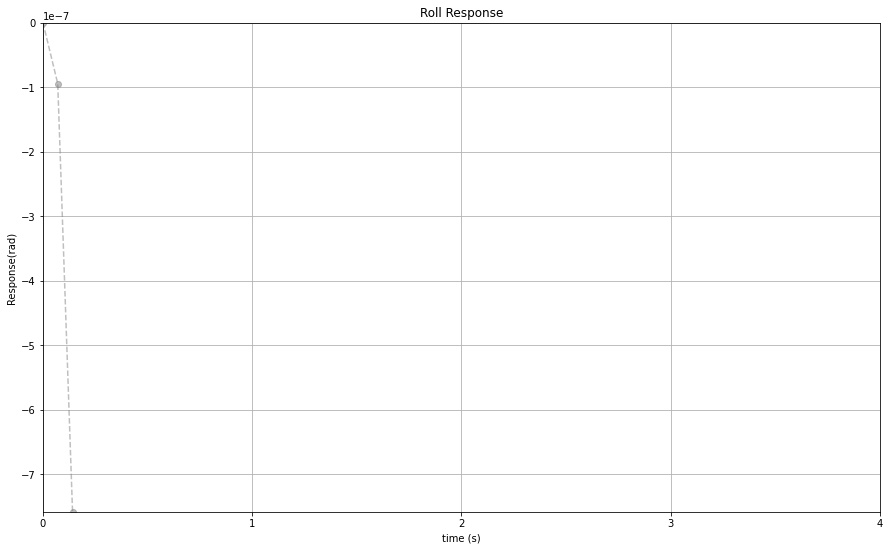

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


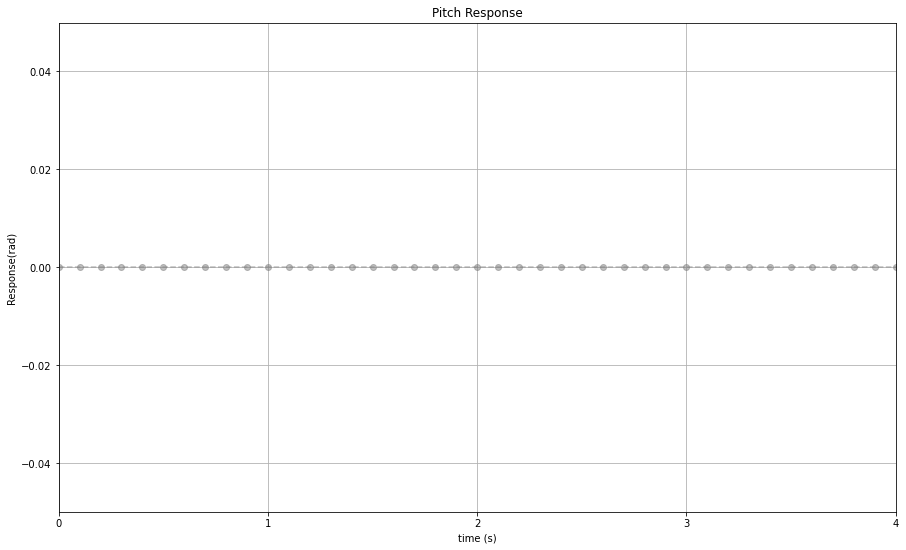

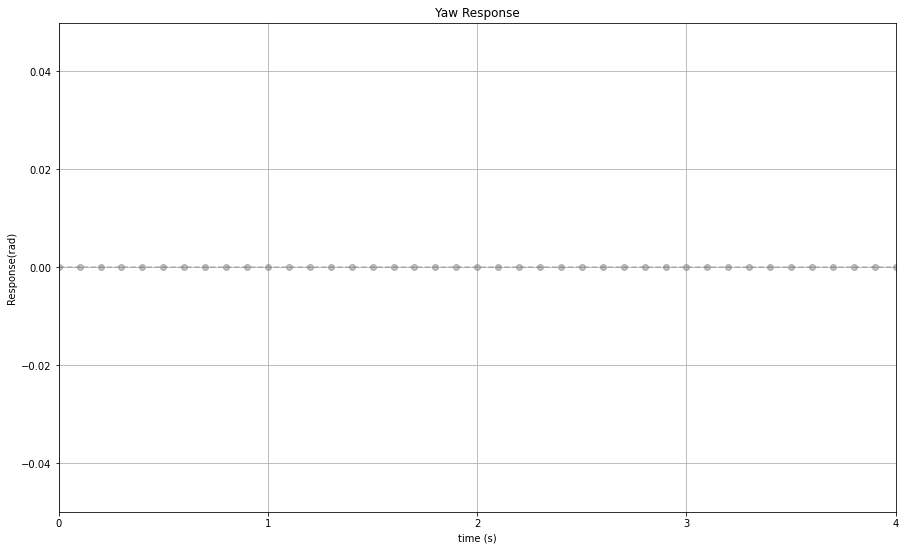

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


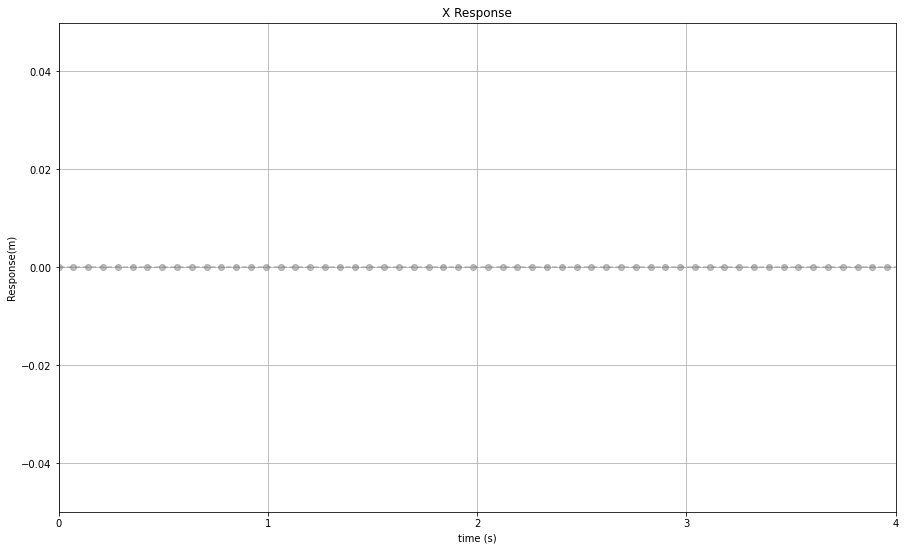

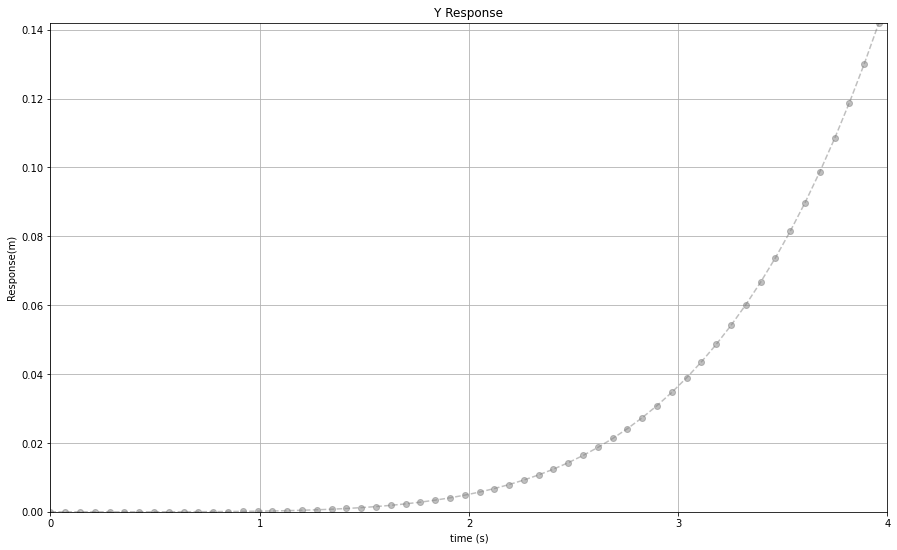

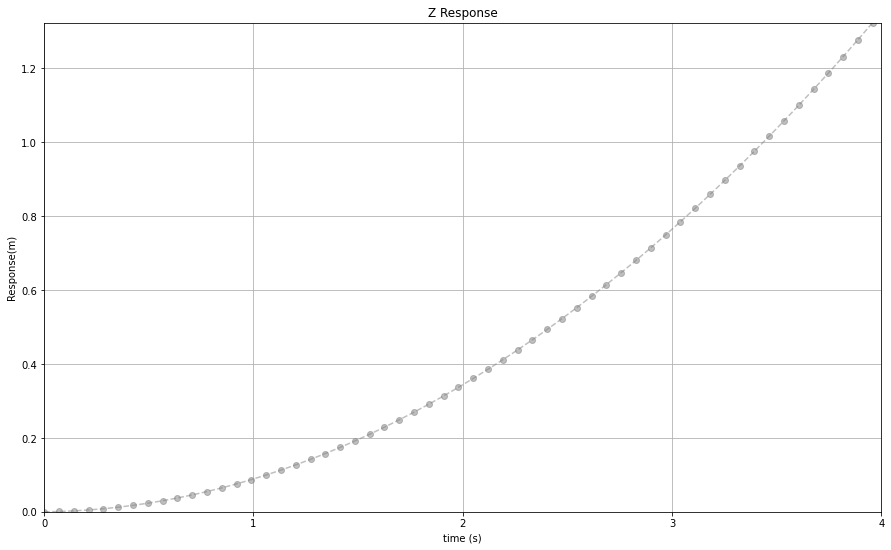

In [ ]:
#positive roll
test2 = Quadcopter()
test2.input([4.52],[4.5198],[4.52],[4.5202])
test2.responses()


V1 transfer function = 
4.52
----
  s

V2 transfer function = 
4.52
----
  s

V3 transfer function = 
4.52
----
  s

V4 transfer function = 
4.52
----
  s



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


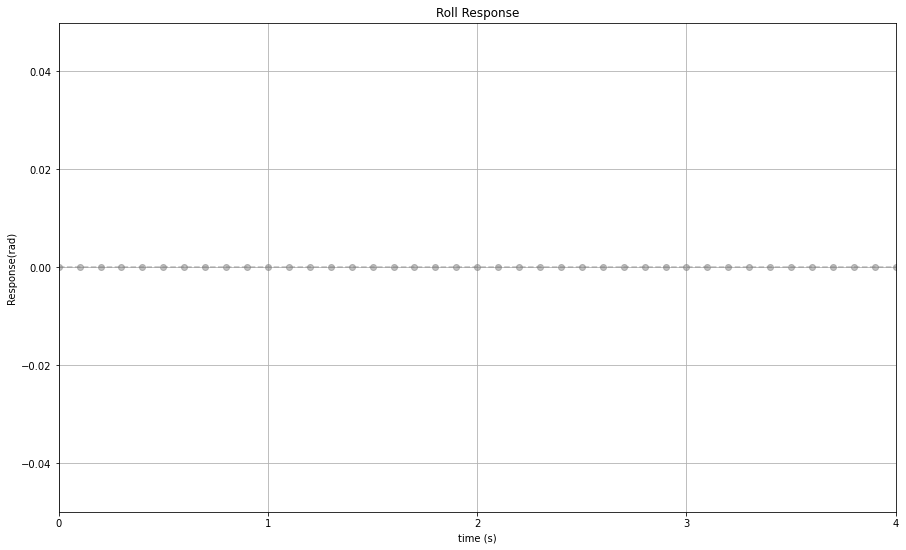

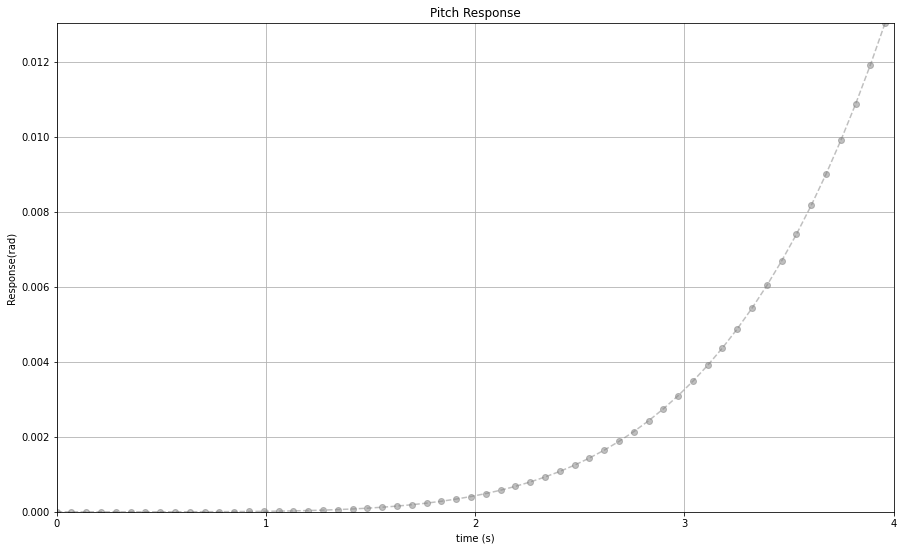

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


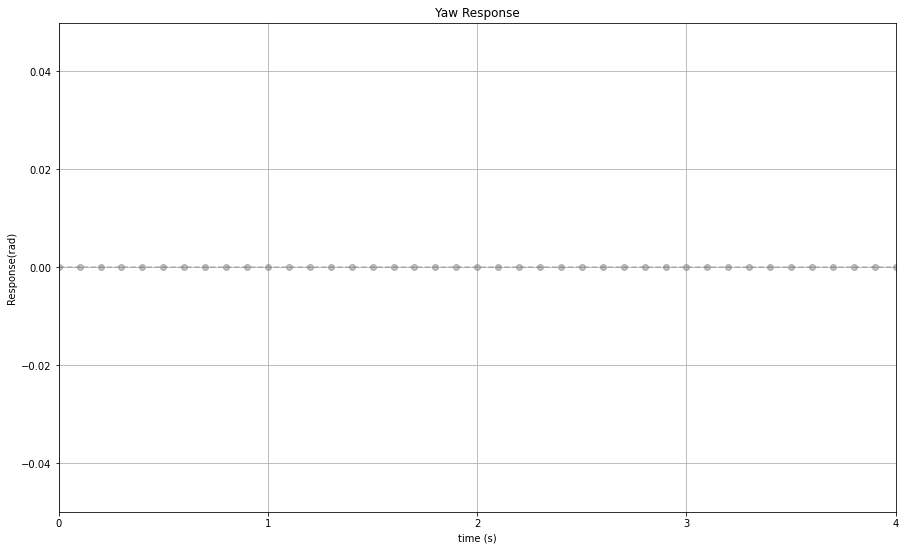

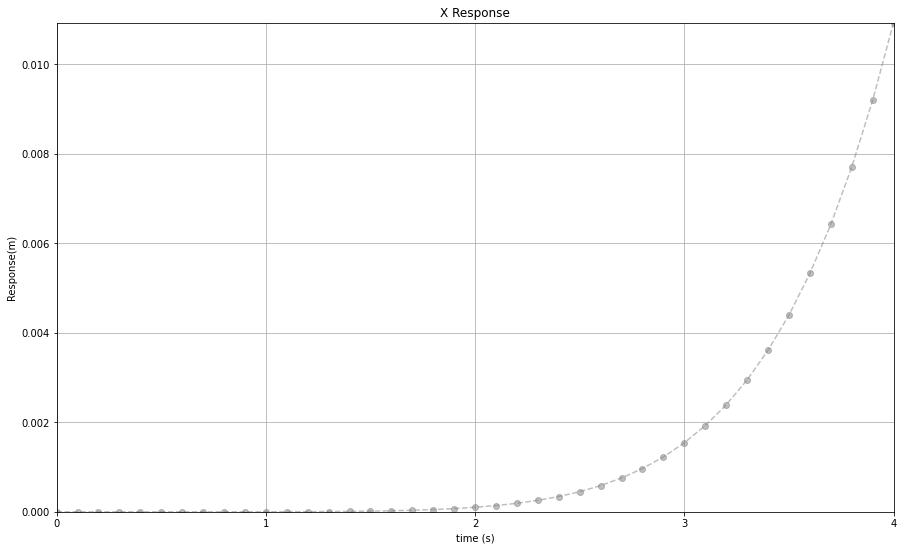

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


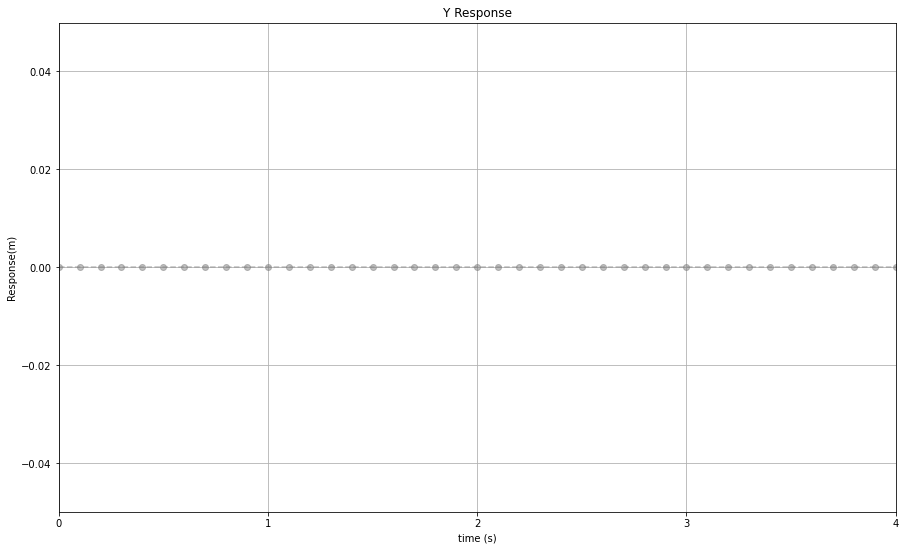

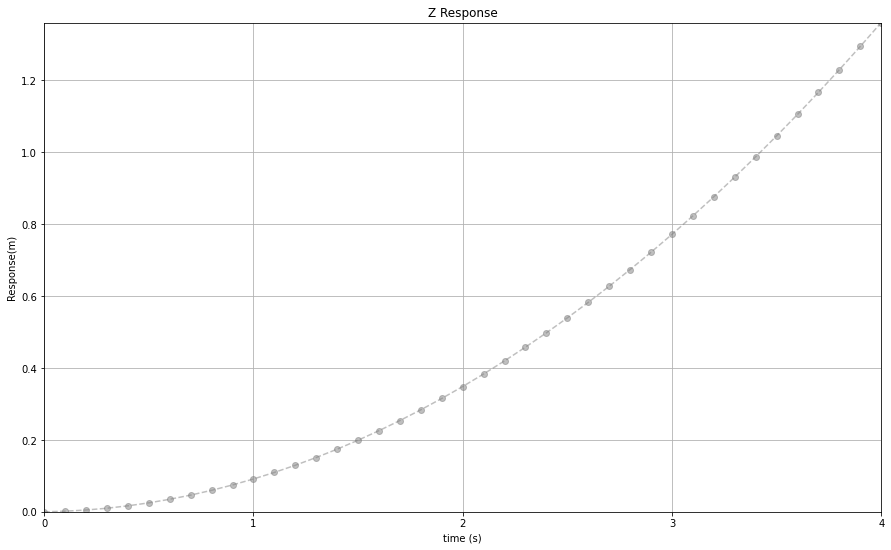

In [ ]:
#positive pitch
test2 = Quadcopter()
test2.input([4.5198],[4.52],[4.5202],[4.52])
test2.responses()

V1 transfer function = 
4.525
-----
  s

V2 transfer function = 
4.515
-----
  s

V3 transfer function = 
4.525
-----
  s

V4 transfer function = 
4.515
-----
  s



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


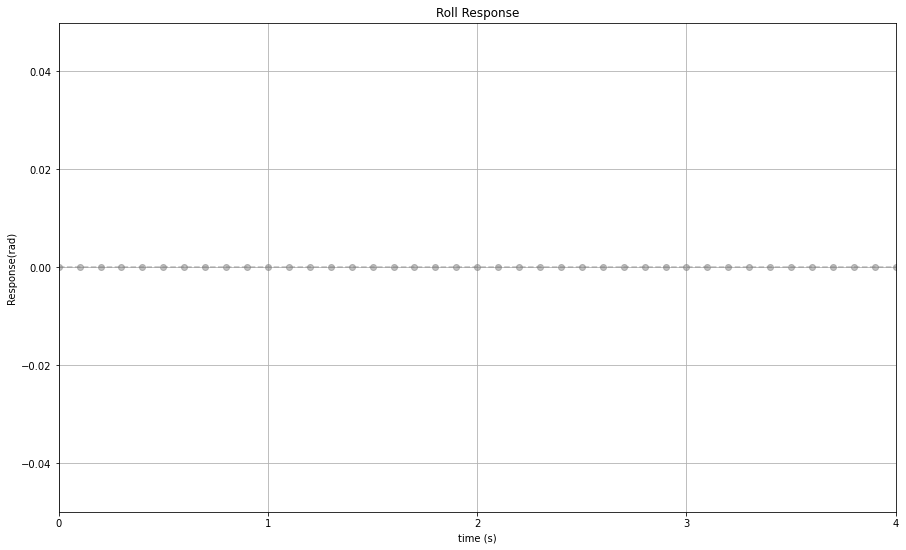

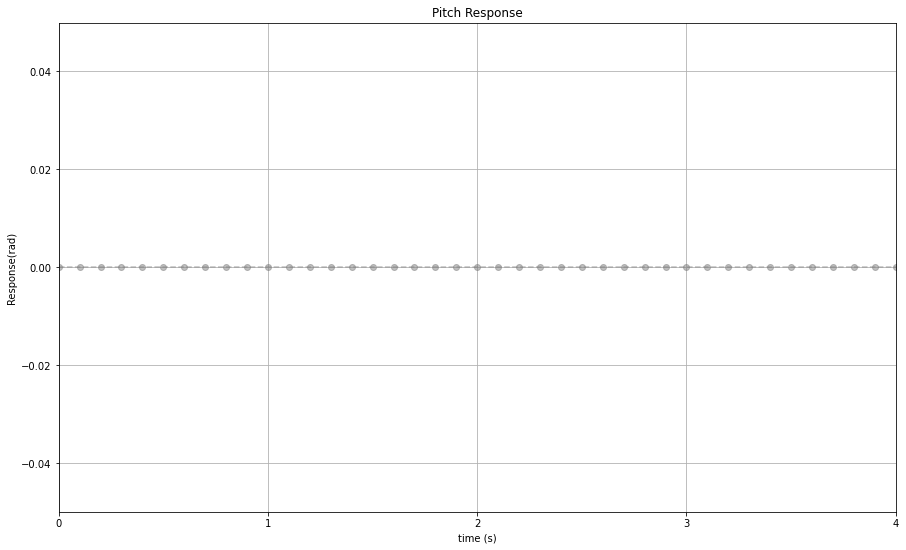

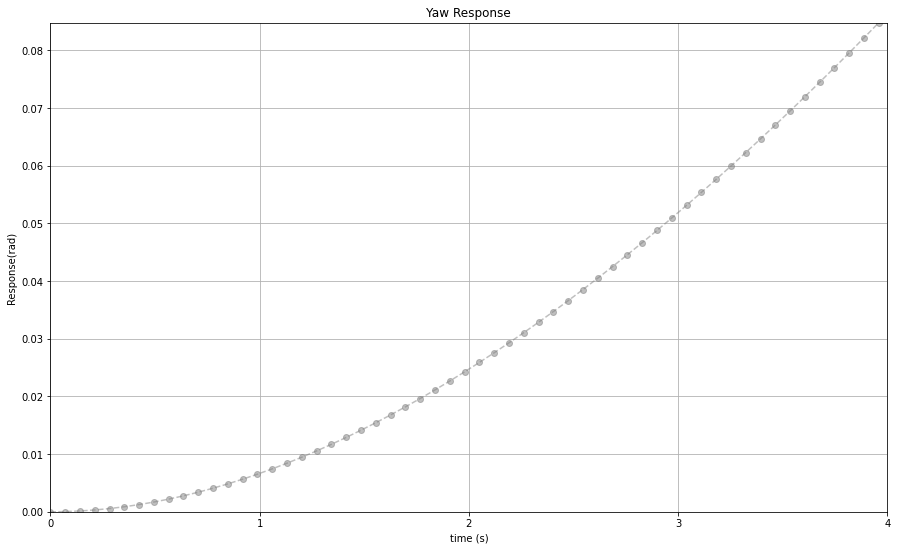

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


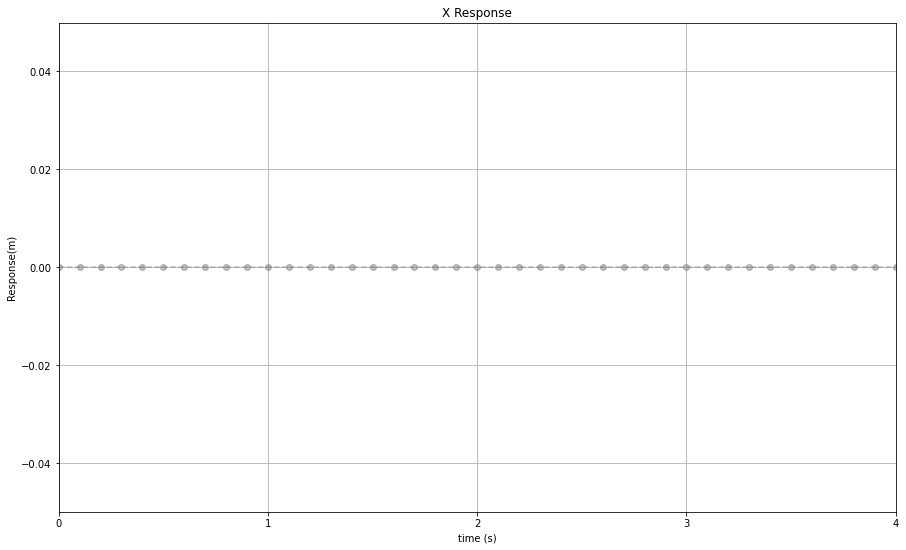

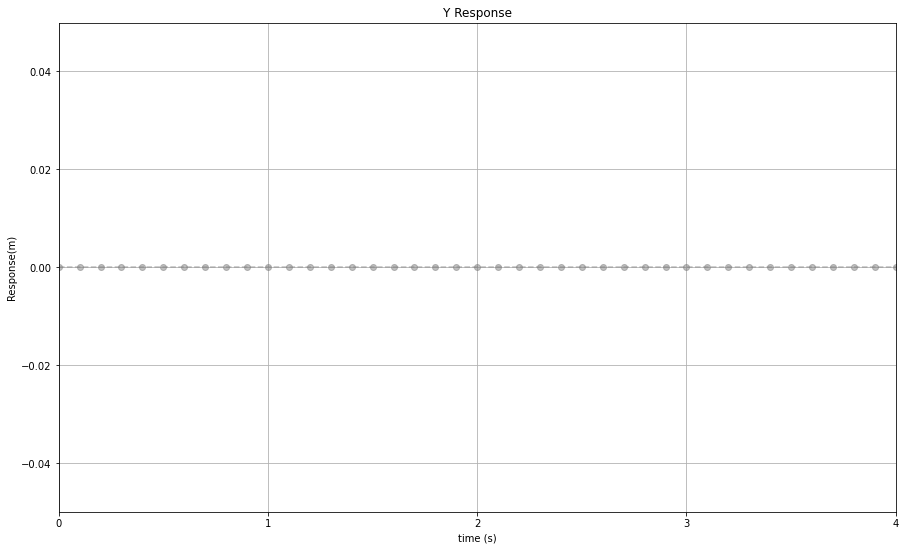

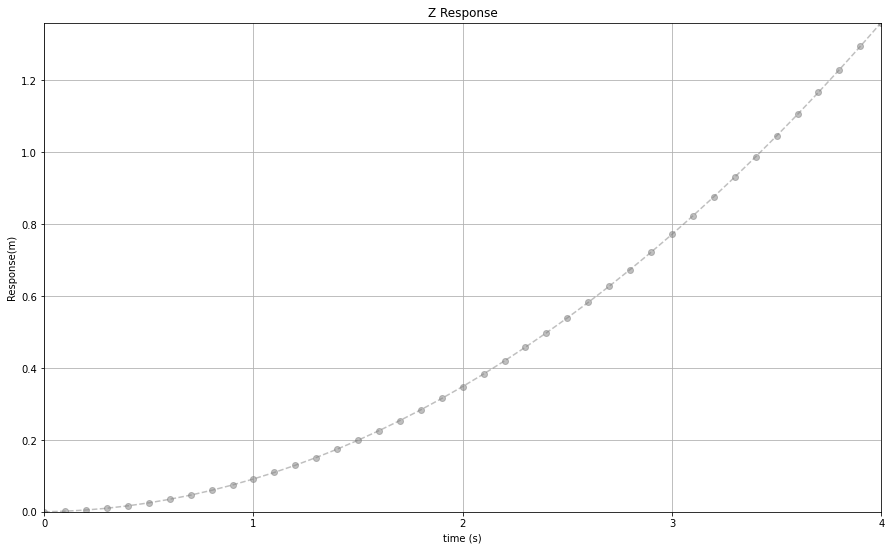

In [ ]:
#positive yaw
test3 = Quadcopter()
test3.input([4.525],[4.515],[4.525],[4.515])
test3.responses()

V1 transfer function = 
4.6
---
 s

V2 transfer function = 
4.6
---
 s

V3 transfer function = 
4.6
---
 s

V4 transfer function = 
4.6
---
 s



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


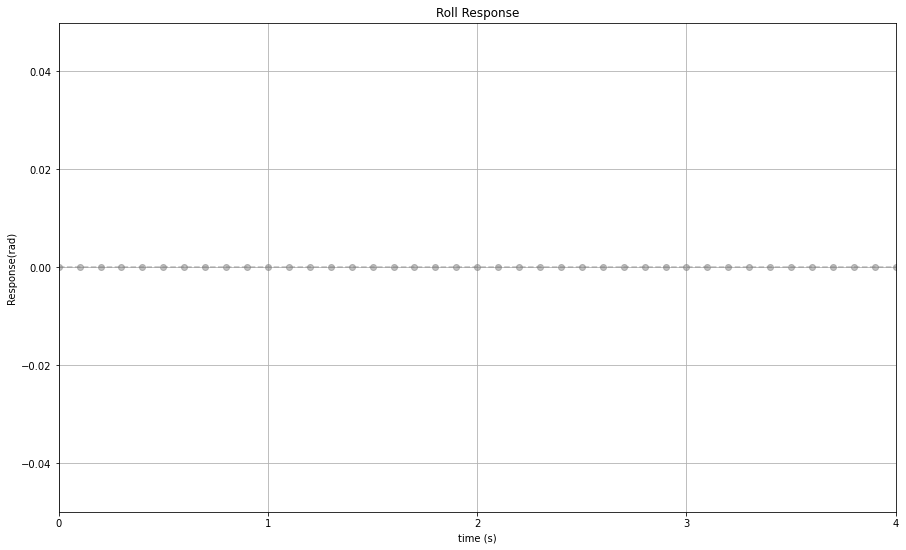

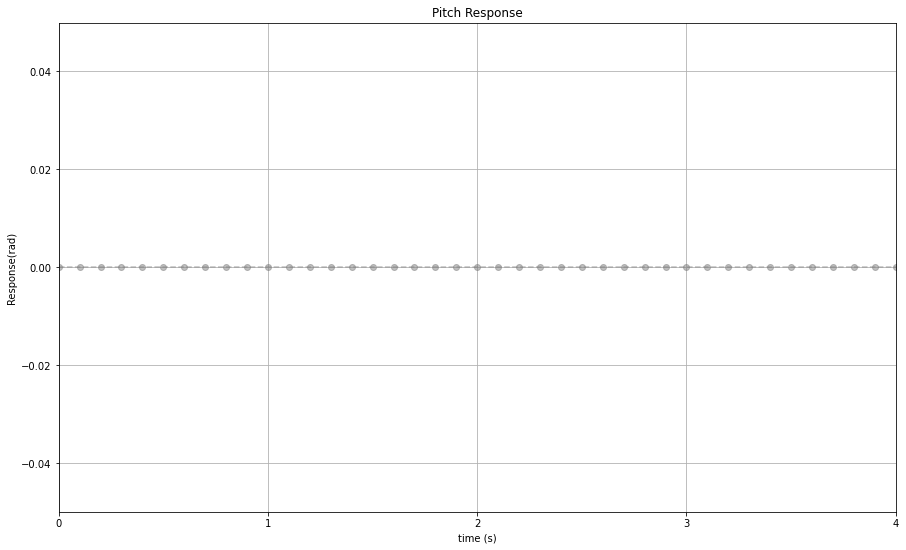

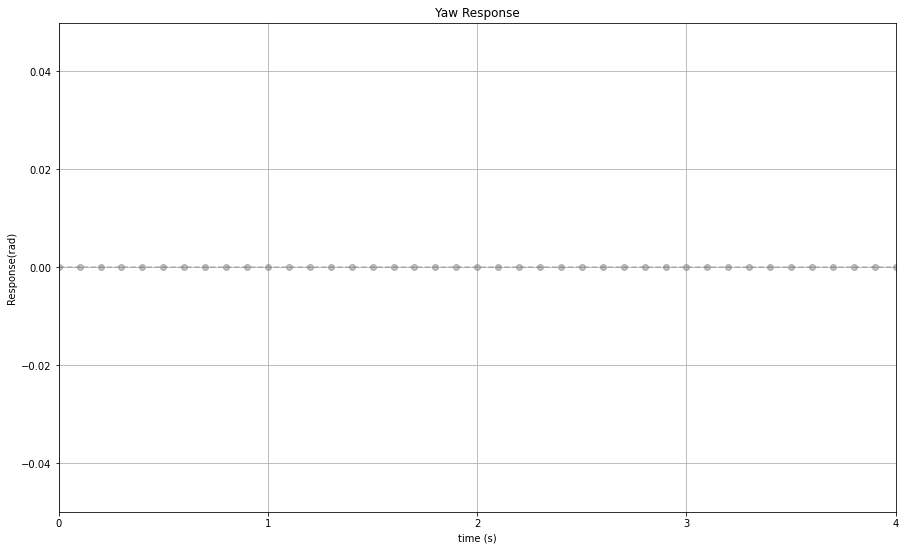

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


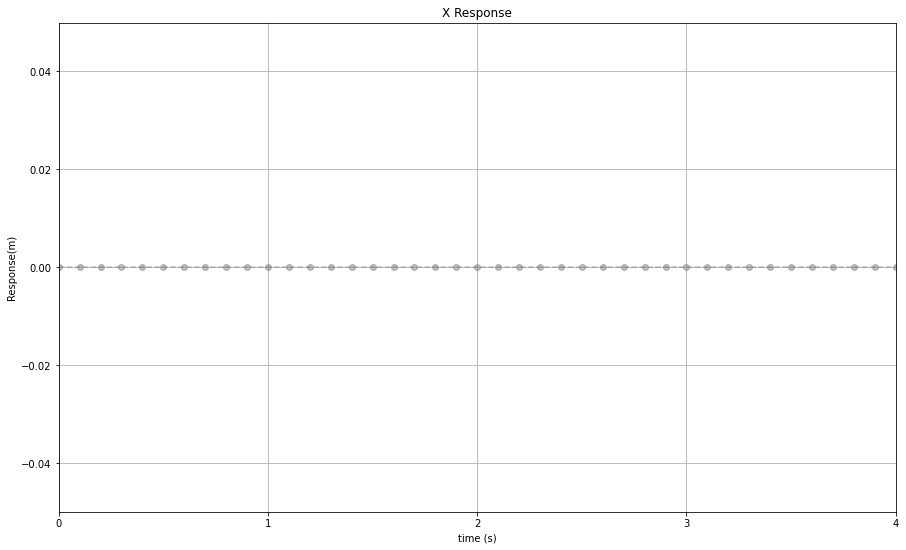

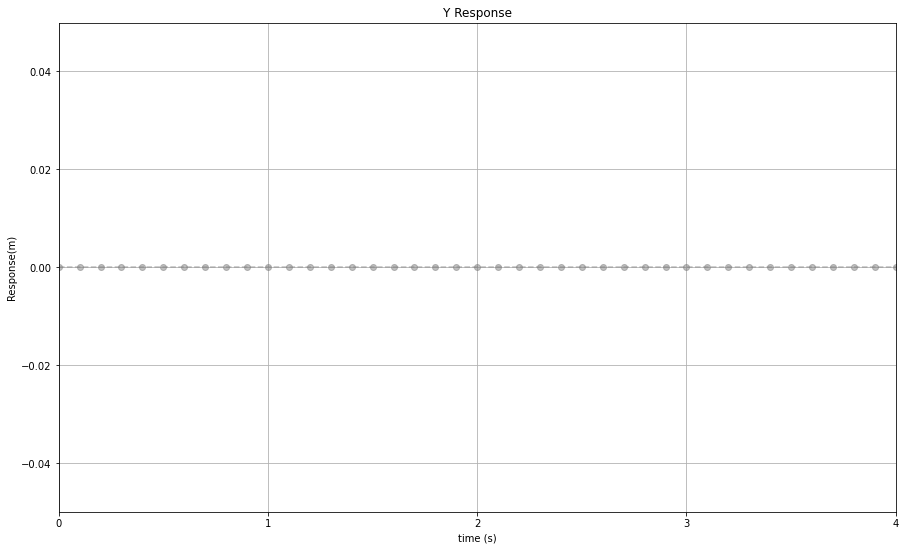

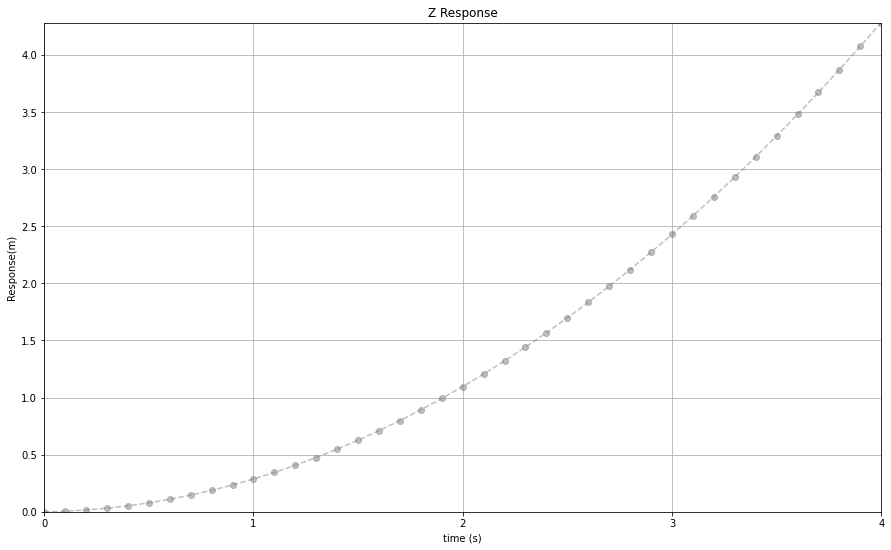

In [ ]:
#vertical climbing
test4 = Quadcopter()
test4.input([4.6],[4.6],[4.6],[4.6])
test4.responses()